In [47]:
import pickle
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold

In [48]:
with open('./data/titanic.pkl', 'rb') as f:
   X_titanic_train, y_titanic_train, X_titanic_test, y_titanic_test = pickle.load(f)
   
X_titanic = np.concatenate((X_titanic_train, X_titanic_test), axis=0)
y_titanic = np.concatenate((y_titanic_train, y_titanic_test), axis=0)

In [49]:
results_tree = []
results_neural_network = []
results_svm = []

for i in range(30):
   kfold = KFold(n_splits=10, shuffle=True, random_state=i)
   
   decision_tree = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=15, min_samples_split=25, splitter='random')
   scores_tree = cross_val_score(decision_tree, X_titanic, y_titanic, cv=kfold)
   results_tree.append(scores_tree.mean())
   
   svm = SVC(kernel = 'rbf', C = 100.0, tol=0.001)
   scores_svm = cross_val_score(svm, X_titanic, y_titanic, cv=kfold)
   results_svm.append(scores_svm.mean())

   neural_network = MLPClassifier(max_iter=2000, activation='logistic', hidden_layer_sizes=(8, 8, 8), solver='adam', tol=1e-05)
   scores_neural_network = cross_val_score(neural_network, X_titanic, y_titanic, cv=kfold)
   results_neural_network.append(scores_neural_network.mean())
   

In [50]:
print(len(results_tree), len(results_neural_network), len(results_svm))

30 30 30


In [51]:
results = pd.DataFrame({'Tree': results_tree, 'Neural Network': results_neural_network, 'SVM': results_svm})

results

,Tree,Neural Network,SVM
0,0.855385,0.860728,0.836242
1,0.853089,0.867651,0.836283
2,0.855385,0.863770,0.836260
3,0.857716,0.862278,0.834733
4,0.853124,0.866160,0.838620
5,0.856882,0.863776,0.840840
6,0.860810,0.855461,0.838638
7,0.862290,0.863823,0.836312
8,0.859971,0.863012,0.839272
9,0.857663,0.856142,0.837029


In [52]:
results.describe()

,Tree,Neural Network,SVM
count,30.000000,30.000000,30.000000
mean,0.856724,0.861801,0.837775
std,0.003053,0.003557,0.001520
min,0.851609,0.855414,0.834733
25%,0.853884,0.859962,0.836487
50%,0.856544,0.861917,0.837786
75%,0.859772,0.863817,0.839113
max,0.862290,0.868420,0.840840


In [53]:
print(results.var())
print((results.std() / results.mean()) * 100)


Tree              0.000009
Neural Network    0.000013
SVM               0.000002
dtype: float64
Tree              0.356335
Neural Network    0.412708
SVM               0.181403
dtype: float64


In [54]:
alpha = 0.05

In [55]:
from scipy.stats import shapiro

In [56]:
shapiro(results_tree), shapiro(results_neural_network), shapiro(results_svm)

(ShapiroResult(statistic=0.9492027163505554, pvalue=0.16094158589839935),
 ShapiroResult(statistic=0.9627482295036316, pvalue=0.36342909932136536),
 ShapiroResult(statistic=0.9600889682769775, pvalue=0.31140029430389404))

In [57]:
import seaborn as sns

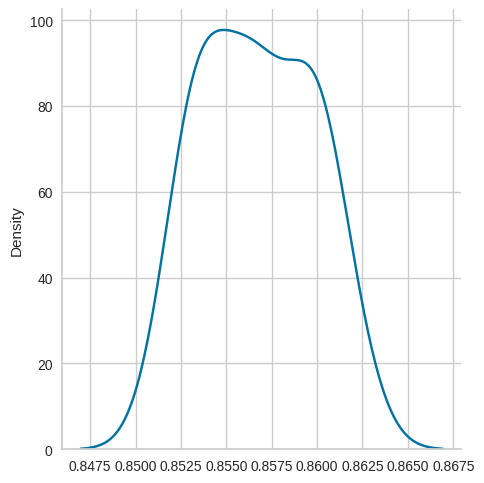

In [58]:
sns.displot(results_tree, kind='kde')

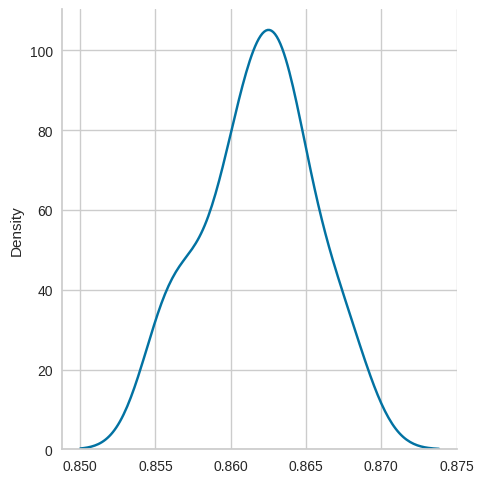

In [59]:
sns.displot(results_neural_network, kind='kde')

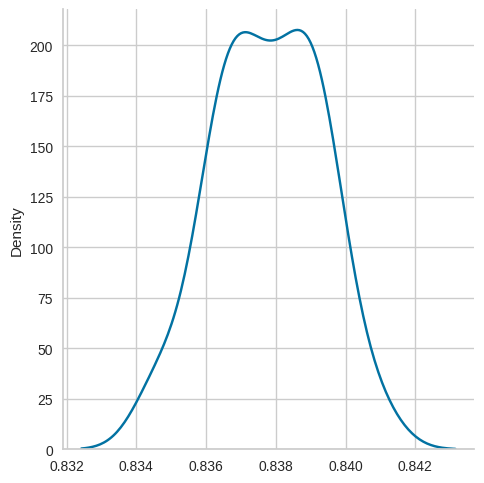

In [60]:
sns.displot(results_svm, kind='kde')

# Teste de Hípotese

In [61]:
from scipy.stats import f_oneway

In [62]:
_, p = f_oneway(results_tree, results_neural_network, results_svm)
p

1.8515784346768857e-51

In [63]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [64]:
results_agm = {
   'accuracy': np.concatenate([results_tree, results_neural_network, results_svm]),
   'agm': ['tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',]
}

In [65]:
results_df = pd.DataFrame(results_agm)
results_df

,accuracy,agm
0,0.855385,tree
1,0.853089,tree
2,0.855385,tree
3,0.857716,tree
4,0.853124,tree
...,...,...
85,0.839342,svm
86,0.840047,svm
87,0.839354,svm
88,0.834739,svm


In [66]:
results.mean()

Tree              0.856724
Neural Network    0.861801
SVM               0.837775
dtype: float64

In [67]:
from statsmodels.stats.multicomp import MultiComparison

In [68]:
comp_agm = MultiComparison(results_df['accuracy'], results_df['agm'])

In [69]:
test_tukey = comp_agm.tukeyhsd()
print(test_tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
    group1     group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
neural_network    svm   -0.024   0.0 -0.0258 -0.0223   True
neural_network   tree  -0.0051   0.0 -0.0068 -0.0033   True
           svm   tree   0.0189   0.0  0.0172  0.0207   True
-----------------------------------------------------------


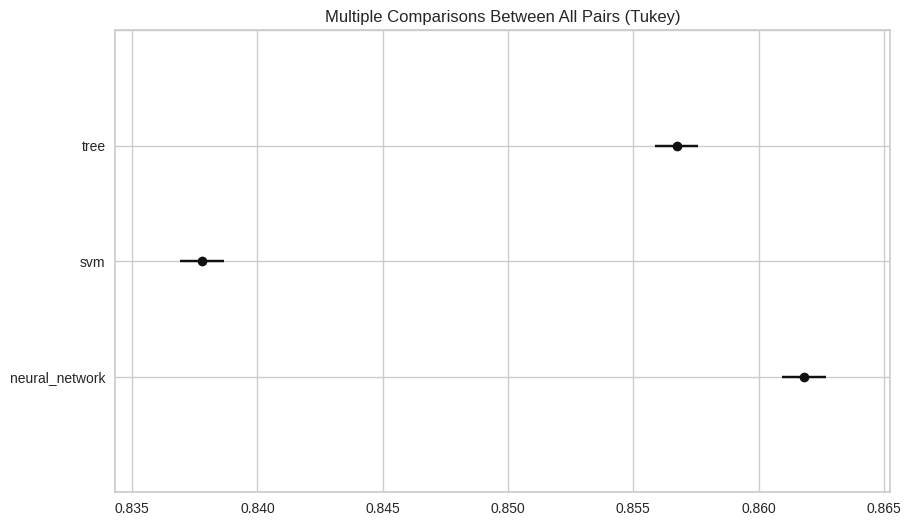

In [70]:
test_tukey.plot_simultaneous();